<AxesSubplot:>

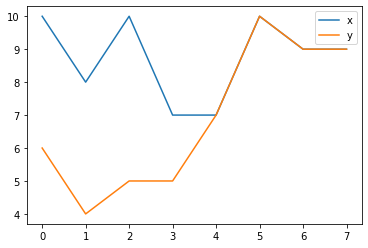

In [4]:
#Graphs and Visualizations
import pandas as pd
df = pd.DataFrame({'x': [10, 8, 10, 7, 7, 10, 9, 9],
'y': [6, 4, 5, 5, 7, 10, 9, 9]})
df.plot()


<AxesSubplot:>

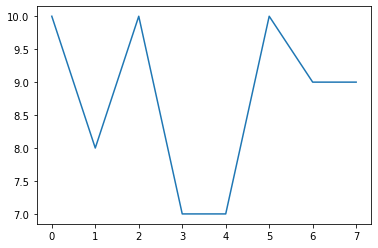

In [5]:
#subset
df['x'].plot()

<AxesSubplot:>

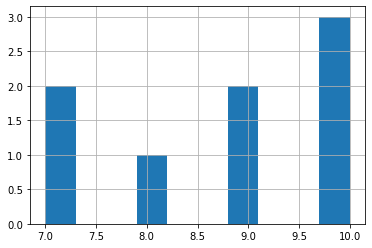

In [6]:
df['x'].hist()

<AxesSubplot:ylabel='x'>

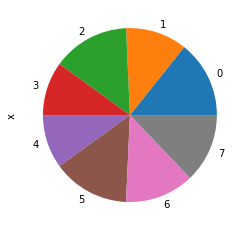

In [7]:
df['x'].plot(kind='pie')

In [9]:
#Grouping Data

df = pd.DataFrame({'A': ['a', 'b', 'c', 'a', 'b', 'b'],
 'B': [2, 8, 1, 4, 3, 8],
 'C': [102, 98, 107, 104, 115, 87]})
df

,A,B,C
0,a,2,102
1,b,8,98
2,c,1,107
3,a,4,104
4,b,3,115
5,b,8,87


In [10]:
df.groupby('A').mean()

,B,C
A,,
a,3.000000,103.0
b,6.333333,100.0
c,1.000000,107.0


In [11]:
df.groupby(['A','B']).mean()

C
A B       
a 2  102.0
  4  104.0
b 3  115.0
  8   92.5
c 1  107.0

In [12]:
df.groupby(['A','B']).agg(['count', 'mean'])

C       
    count   mean
A B             
a 2     1  102.0
  4     1  104.0
b 3     1  115.0
  8     2   92.5
c 1     1  107.0

In [16]:
import numpy as np
np.random.seed(0)
df = pd.DataFrame({'Age': np.random.randint(20, 70, 100),
 'Sex': np.random.choice(['Male', 'Female'], 100),
 'number_of_foo': np.random.randint(1, 20, 100)})
df.head()

,Age,Sex,number_of_foo
0,64,Female,14
1,67,Female,14
2,20,Female,12
3,23,Male,17
4,23,Female,15


In [17]:
pd.cut(df['Age'], bins=4)


0       (56.75, 69.0]
1       (56.75, 69.0]
2     (19.951, 32.25]
3     (19.951, 32.25]
4     (19.951, 32.25]
           ...       
95      (32.25, 44.5]
96      (32.25, 44.5]
97      (32.25, 44.5]
98      (56.75, 69.0]
99      (56.75, 69.0]
Name: Age, Length: 100, dtype: category
Categories (4, interval[float64]): [(19.951, 32.25] < (32.25, 44.5] < (44.5, 56.75] < (56.75, 69.0]]

In [18]:
pd.cut(df['Age'], bins=[19, 40, 65, np.inf])

0     (40.0, 65.0]
1      (65.0, inf]
2     (19.0, 40.0]
3     (19.0, 40.0]
4     (19.0, 40.0]
          ...     
95    (19.0, 40.0]
96    (19.0, 40.0]
97    (40.0, 65.0]
98     (65.0, inf]
99     (65.0, inf]
Name: Age, Length: 100, dtype: category
Categories (3, interval[float64]): [(19.0, 40.0] < (40.0, 65.0] < (65.0, inf]]

In [19]:
age_groups = pd.cut(df['Age'], bins=[19, 40, 65, np.inf])
df.groupby(age_groups)['number_of_foo'].mean()

Age
(19.0, 40.0]    9.880000
(40.0, 65.0]    9.452381
(65.0, inf]     9.250000
Name: number_of_foo, dtype: float64

In [20]:
pd.crosstab(age_groups, df['Sex'])

Sex,Female,Male
Age,,
"(19.0, 40.0]",22,28
"(40.0, 65.0]",18,24
"(65.0, inf]",3,5


In [22]:
#Column selection of a group
df = pd.DataFrame([[1, 1, 2], [1, 2, 3], [2, 3, 4]], columns=["A", "B", "C"])
df

,A,B,C
0,1,1,2
1,1,2,3
2,2,3,4


In [24]:
g = df.groupby("A")
g

In [25]:
g["B"].mean() 

A
1    1.5
2    3.0
Name: B, dtype: float64

In [26]:
g[["B", "C"]].mean() 

,B,C
A,,
1,1.5,2.5
2,3.0,4.0


In [27]:
g.agg({'B': 'mean', 'C': 'count'})

,B,C
A,,
1,1.5,2
2,3.0,1


In [29]:
df = pd.DataFrame(
 {"Name":["Alice", "Bob", "Mallory", "Mallory", "Bob" , "Mallory"],
 "City":["Seattle", "Seattle", "Portland", "Seattle", "Seattle", "Portland"],
 "Val": [4, 3, 3, np.nan, np.nan, 4]})
df

,Name,City,Val
0,Alice,Seattle,4.0
1,Bob,Seattle,3.0
2,Mallory,Portland,3.0
3,Mallory,Seattle,NaN
4,Bob,Seattle,NaN
5,Mallory,Portland,4.0


In [30]:
df.groupby(["Name", "City"])['Val'].size().reset_index(name='Size')

,Name,City,Size
0,Alice,Seattle,1
1,Bob,Seattle,2
2,Mallory,Portland,2
3,Mallory,Seattle,1


In [31]:
df.groupby(["Name", "City"])['Val'].count().reset_index(name='Count')


,Name,City,Count
0,Alice,Seattle,1
1,Bob,Seattle,1
2,Mallory,Portland,2
3,Mallory,Seattle,0


In [34]:
df = pd.DataFrame({'A': list('XYZXYZXYZX'), 'B': [1, 2, 1, 3, 1, 2, 3, 3, 1, 2],
 'C': [12, 14, 11, 12, 13, 14, 16, 12, 10, 19]})


In [33]:
df.groupby('A').agg({'B': [np.mean, np.std], 'C': [np.sum, 'count']})

B             C      
       mean       std sum count
A                              
X  2.250000  0.957427  59     4
Y  2.000000  1.000000  39     3
Z  1.333333  0.577350  35     3

In [35]:
#Grouping Time Series Data
import matplotlib.pyplot as plt


In [36]:
# I want 7 days of 24 hours with 60 minutes each
periods = 7 * 24 * 60
tidx = pd.date_range('2016-07-01', periods=periods, freq='T')

In [37]:
np.random.seed([3,1415])


In [38]:
data = np.random.randn(periods)

In [39]:
ts = pd.Series(data=data, index=tidx, name='HelloTimeSeries')

In [40]:
ts.describe()

count    10080.000000
mean        -0.008853
std          0.995411
min         -3.936794
25%         -0.683442
50%          0.002640
75%          0.654986
max          3.906053
Name: HelloTimeSeries, dtype: float64

In [41]:
ts.resample('15T').last()


2016-07-01 00:00:00   -0.911575
2016-07-01 00:15:00    0.831452
2016-07-01 00:30:00    1.258253
2016-07-01 00:45:00   -0.017209
2016-07-01 01:00:00    0.025249
                         ...   
2016-07-07 22:45:00   -0.112963
2016-07-07 23:00:00   -1.684835
2016-07-07 23:15:00   -0.268678
2016-07-07 23:30:00    1.097568
2016-07-07 23:45:00   -0.543848
Freq: 15T, Name: HelloTimeSeries, Length: 672, dtype: float64

<AxesSubplot:>

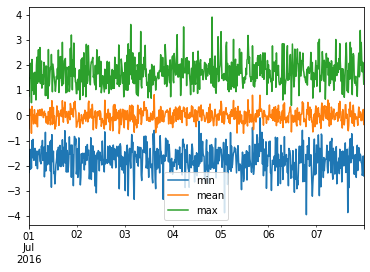

In [42]:
ts.resample('15T').agg(['min', 'mean', 'max']).plot()

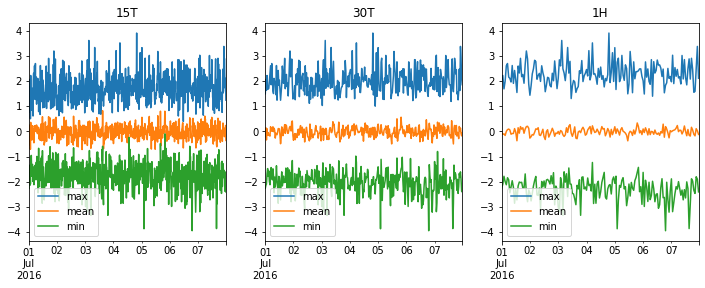

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, freq in enumerate(['15T', '30T', '1H']):
 ts.resample(freq).agg(['max', 'mean', 'min']).plot(ax=axes[i], title=freq)